<a href="https://colab.research.google.com/github/heliocarrara/Python-IA/blob/main/redesneurais_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
df = pd.read_csv('emprego.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [170]:
df.dropna(inplace=True)
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

In [171]:
x = df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'gender']]
y = df['salary']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [173]:
from sklearn.neural_network import MLPRegressor

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Loss')

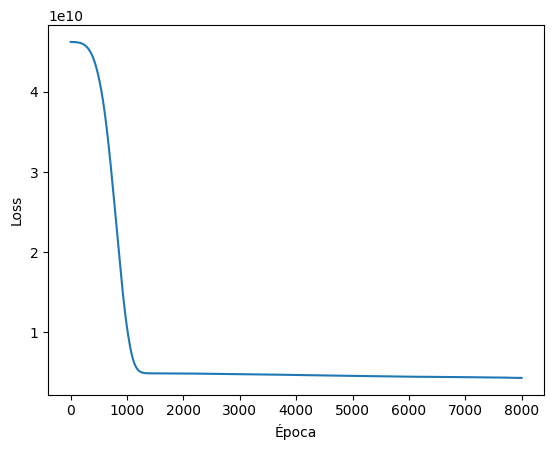

In [176]:
modelo = MLPRegressor(
    hidden_layer_sizes=(32, 16, 8),
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.0005,
    max_iter=8000,
    shuffle=True,
    random_state=30,
    validation_fraction=0.2,
    verbose=False)

modelo.fit(X_train, y_train)
plt.plot(modelo.loss_curve_)
plt.xlabel('Época')
plt.ylabel('Loss')

Dados de treinamento
r2: 0.08953992751378859
MAE: 53179.11199435622
MSE: 8579962375.599432
RMSE: 92628.08632158733
Dados de teste
r2: 0.04269244731424393
MAE: 56335.64416587091
MSE: 6663505390.150571
RMSE: 81630.2970112848
Acurácia no Treinamento: 83.02%
Acurácia no Teste: 81.02%


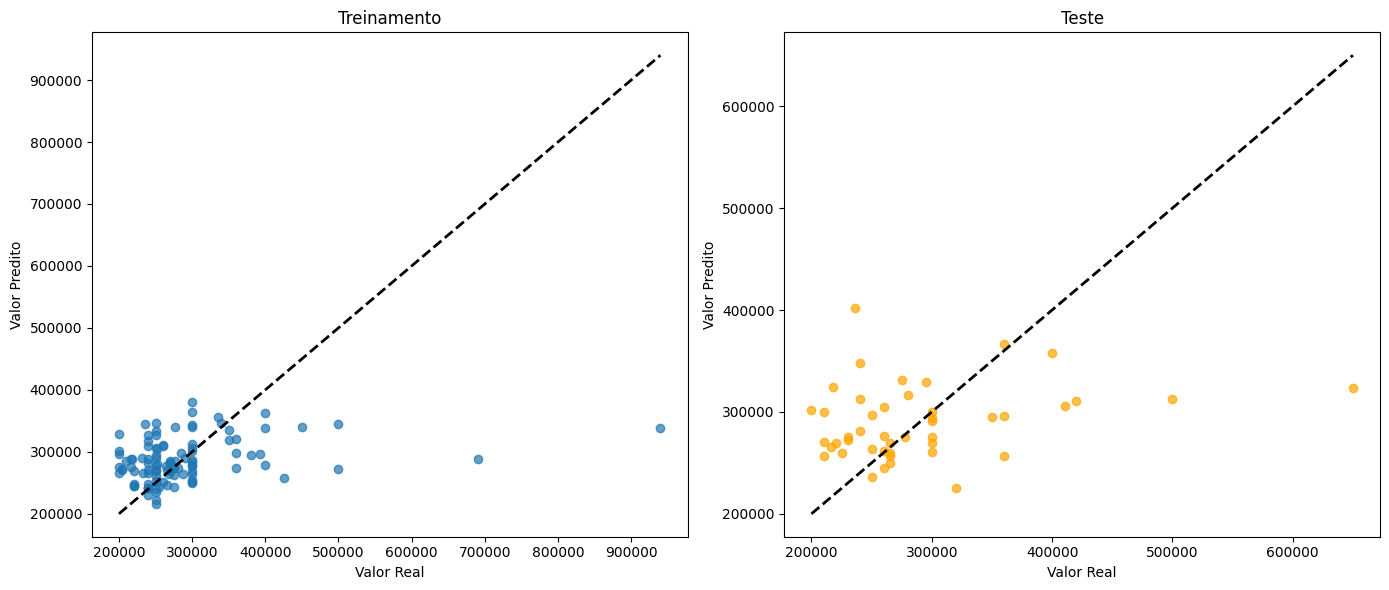

In [177]:
print('Dados de treinamento')

predicao = modelo.predict(X_train)

print('r2:', metrics.r2_score(y_train, predicao))
print('MAE:', metrics.mean_absolute_error(y_train, predicao))
print('MSE:', metrics.mean_squared_error(y_train, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predicao)))


print('Dados de teste')

predicao = modelo.predict(X_test)

print('r2:', metrics.r2_score(y_test, predicao))
print('MAE:', metrics.mean_absolute_error(y_test, predicao))
print('MSE:', metrics.mean_squared_error(y_test, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicao)))




y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
accuracy_train = 100 - mape_train

mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
accuracy_test = 100 - mape_test

print(f"Acurácia no Treinamento: {accuracy_train:.2f}%")
print(f"Acurácia no Teste: {accuracy_test:.2f}%")



plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Treinamento')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Teste')

plt.tight_layout()
plt.show()
